# Examples of Nonparametric Statistical Hypothesis Tests

Author(s): Miguel Xochicale @mxochicale    
Contributor(s): 

## Running notebook
```
conda activate simpleVE
jupyter notebook --browser=firefox
```
## Logbook
* 05March2023: Created notebook and added examples 
    
## References:
* https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pingouin
# generate gaussian data samples
import numpy as np

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std


In [2]:
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50 #Gaussian random numbers
data2 = 5 * randn(100) + 51 #Gaussian random numbers
# data2 = np.random.poisson(5, 100) #poisson distribution

#We will use the randn() NumPy function to generate a sample of 100 Gaussian random numbers in each sample 
#with a mean of 0 and a standard deviation of 1. 
#Observations in the first sample are scaled to have a mean of 50 and a standard deviation of 5. 
#Observations in the second sample are scaled to have a mean of 51 and a standard deviation of 5.
data = {
        'data1': data1,
        'data2': data2        
        }

df = pd.DataFrame(data)
df

,data1,data2
0,58.121727,48.764357
1,46.941218,57.122539
2,47.359141,53.017458
3,44.635157,53.967893
4,54.327038,45.525441
...,...,...
95,50.386700,42.862808
96,48.280732,54.011596
97,50.217984,53.101411
98,46.899996,55.054758


In [3]:
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))


data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


In [4]:
# summarize
df[['data1','data2']].describe()

,data1,data2
count,100.000000,100.000000
mean,50.302914,51.763974
std,4.448077,4.683450
min,38.492307,38.825811
25%,46.930912,49.499950
50%,50.320370,52.183079
75%,53.187052,54.715101
max,60.927877,63.641629


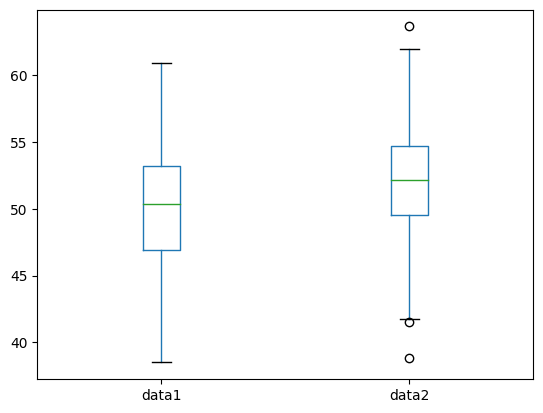

In [5]:
# There doesn’t appear to be any significant outliers in the variables.
df.boxplot(column=['data1', 'data2'], grid=False)
plt.show()

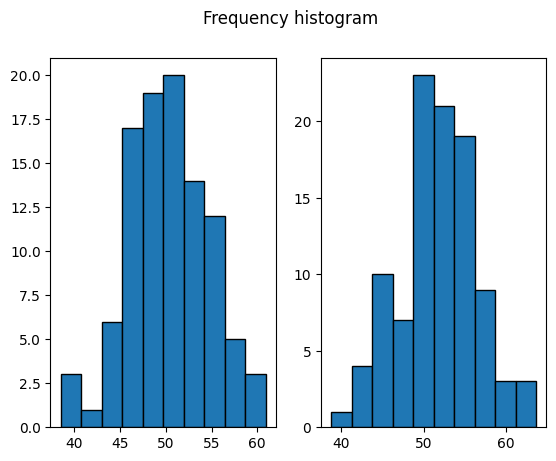

In [6]:
# The histograms of our data does not seem to be normally distributed. There looks to be some skew.
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram')
ax1.hist(df['data1'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['data2'], bins=10, histtype='bar', ec='k') 
# ax1.set_xlabel("Yield")
# ax2.set_xlabel("Yield")
plt.show()

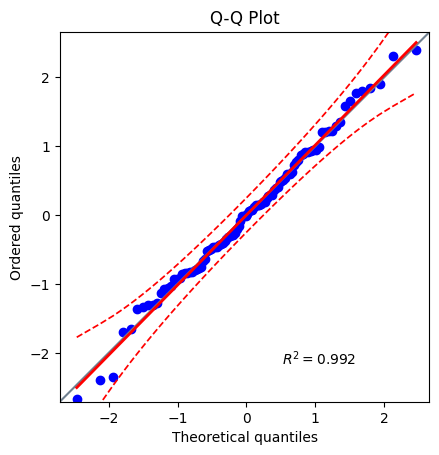

In [7]:
# stats.probplot(df['bp_before'], dist="norm", plot=plt)
pingouin.qqplot(df['data1'], dist='norm')
plt.title("Q-Q Plot")
plt.show()


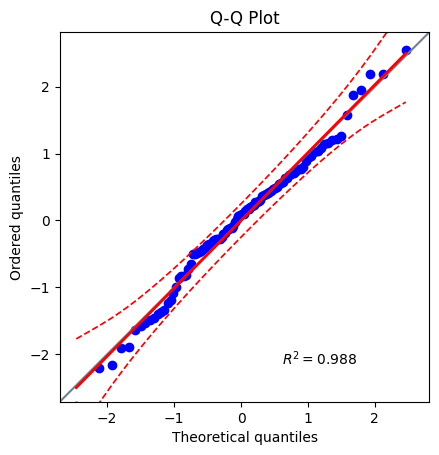

In [8]:
# stats.probplot(df['bp_after'], dist="norm", plot=plt)
pingouin.qqplot(df['data2'], dist='norm')
plt.title("Q-Q Plot")
plt.show()

In [9]:
statistic, pvalue = stats.shapiro(df['data1'])
print(f'Statistics={statistic}, p={pvalue}')

# interpret
alpha = 0.05
if pvalue > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=0.9920047521591187, p=0.8215700387954712
Same distribution (fail to reject H0)


In [10]:
statistic, pvalue = stats.shapiro(df['data2'])
print(f'Statistics={statistic}, p={pvalue}')

# interpret
alpha = 0.05
if pvalue > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=0.9888345003128052, p=0.5716096758842468
Same distribution (fail to reject H0)


In [11]:
stat, p = stats.mannwhitneyu(df['data1'], df['data2'], 
                   use_continuity=True, 
                   alternative='greater'#{'less', 'greater', 'two-sided'}.
                  ) 


print(f'Statistics={stat}, p={p}')


# interpret
alpha = 0.05
if p > alpha:
 print('Same distribution (fail to reject H0)')
else:
 print('Different distribution (reject H0)')

Statistics=4025.0, p=0.9914261601666319
Same distribution (fail to reject H0)


In [12]:
pingouin.mwu(df['data1'], df['data2'], 
            alternative='greater',
            method='exact'
            )



# 'U-val': U-value
# 'alternative': tail of the test : must be one of 'two-sided' (default), 'greater' or 'less'.
# 'p-val': p-value
# 'RBC' : rank-biserial correlation
# 'CLES' : common language effect size
# https://pingouin-stats.org/build/html/generated/pingouin.mwu.html#pingouin.mwu 



,U-val,alternative,p-val,RBC,CLES
MWU,4025.0,greater,0.991539,0.195,0.4025


In [13]:
males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]
stats.mannwhitneyu(males, females, method="exact")


#We follow the example from [4]: nine randomly sampled young adults 
# were diagnosed with type II diabetes at the ages below.

# We use the Mann-Whitney U test to assess whether there is a statistically significant difference in 
# the diagnosis age of males and females. 
# The null hypothesis is that the distribution of male diagnosis ages is the same as the distribution 
# of female diagnosis ages. 
# We decide that a confidence level of 95% is required to reject the null hypothesis in favor of 
# the alternative that the distributions are different. 
# Since the number of samples is very small and there are no ties in the data, 
# we can compare the observed test statistic against the exact distribution of the test statistic 
# under the null hypothesis.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#r31b0b1c0fec3-4

# # https://www.statstutor.ac.uk/resources/uploaded/mannwhitney.pdf
# The exact test and the normal approximation give similar results. We would conclude
# that there is no real evidence that the age at diagnosis is different for males and females,
# although the results are borderline and the lack of statistical significance in this case may
# just be due to the very small sample. The actual median age at diagnosis is 14.5 years
# for females and 22 for males, which is quite a substantial difference. In this case it would
# be advisable to conduct a larger study.


MannwhitneyuResult(statistic=17.0, pvalue=0.1111111111111111)